In [1]:
import pandas as pd

diabetes_df=pd.read_csv('diabetes.csv')

y=diabetes_df['Outcome']

diabetes_df.drop(columns='Outcome', inplace=True)

diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [2]:
diabetes_df.shape  # To check shape 

diabetes_df.isnull().sum() # To check is there any null values exits 

diabetes_df.columns  # To check columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [3]:
# sci-kit learn

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(diabetes_df,y,test_size=0.2,random_state=42)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [4]:
num_cols=[col for col in X_train.columns if X_train[col].dtype=='int64'or 
                                            X_train[col].dtype=='float64']
cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']

In [5]:
for col in num_cols:
    X_train[col].fillna(X_train[col].mean(),inplace=True)
    X_test[col].fillna(X_train[col].mean(),inplace=True)

D:\New folder\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
for col in cat_cols:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

In [7]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [8]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,y_train) # Train the model

y_pred=logreg.predict(X_test) # Predicting the test data

y_pred


D:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

confusion_matrix(y_test,y_pred)
print('Precision-Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1-Score',f1_score(y_test,y_pred))

Precision-Score 0.68
Recall Score 0.6181818181818182
F1-Score 0.6476190476190475


In [10]:
logreg.predict_proba(X_test)[::,1]

array([0.33576123, 0.21921205, 0.17703808, 0.22869413, 0.42773141,
       0.41690942, 0.05372138, 0.69545252, 0.51470707, 0.66418461,
       0.32347708, 0.78073686, 0.40860076, 0.31621296, 0.14626464,
       0.42209492, 0.17542526, 0.13434339, 0.87323427, 0.49929155,
       0.24995769, 0.11554633, 0.51695371, 0.14962059, 0.51770126,
       0.7884748 , 0.2106065 , 0.07079396, 0.23597387, 0.16329469,
       0.78440163, 0.74628872, 0.68444647, 0.83672836, 0.45972627,
       0.6322659 , 0.90344954, 0.23102036, 0.50219822, 0.74155205,
       0.13637735, 0.55823727, 0.49573295, 0.38612207, 0.06283139,
       0.48734327, 0.55219789, 0.25481581, 0.3930456 , 0.86739465,
       0.1059662 , 0.58946395, 0.72829743, 0.29321429, 0.17503379,
       0.08551531, 0.69186512, 0.04981802, 0.39097686, 0.69251947,
       0.6593557 , 0.34754729, 0.25043356, 0.31538822, 0.10604053,
       0.49374583, 0.10350067, 0.54240905, 0.07927893, 0.65400143,
       0.64343928, 0.10689141, 0.25316688, 0.13602852, 0.16649

In [11]:
import matplotlib.pyplot as plt

logregpred_probab=logreg.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,logregpred_probab)


auc = roc_auc_score(y_test, logregpred_probab)

plt.plot(fpr,tpr,label='auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=8)

In [12]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01010101, 0.01010101,
        0.02020202, 0.02020202, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.06060606, 0.06060606, 0.07070707, 0.07070707,
        0.08080808, 0.08080808, 0.09090909, 0.09090909, 0.1010101 ,
        0.1010101 , 0.16161616, 0.16161616, 0.18181818, 0.18181818,
        0.21212121, 0.21212121, 0.23232323, 0.23232323, 0.26262626,
        0.26262626, 0.28282828, 0.28282828, 0.34343434, 0.34343434,
        0.36363636, 0.36363636, 0.37373737, 0.37373737, 0.39393939,
        0.39393939, 0.4040404 , 0.4040404 , 0.41414141, 0.41414141,
        0.49494949, 0.49494949, 0.50505051, 0.50505051, 0.55555556,
        0.55555556, 0.56565657, 0.56565657, 0.57575758, 0.57575758,
        0.58585859, 0.58585859, 0.6969697 , 0.6969697 , 0.76767677,
        0.76767677, 1.        ]),
 array([0.        , 0.01818182, 0.05454545, 0.05454545, 0.14545455,
        0.14545455, 0.30909091, 0.30909091, 0.34545455, 0.34545455,
        0.4   

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy",splitter="best",random_state=10)

dtc.fit(X_train,y_train)

dtc_pred=dtc.predict(X_test)

dtc_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

confusion_matrix(y_test,dtc_pred)

array([[76, 23],
       [18, 37]], dtype=int64)

In [15]:
print('Precision-Score',precision_score(y_test,dtc_pred))
print('Recall Score',recall_score(y_test,dtc_pred))
print('F1-Score',f1_score(y_test,dtc_pred))

Precision-Score 0.6166666666666667
Recall Score 0.6727272727272727
F1-Score 0.6434782608695652


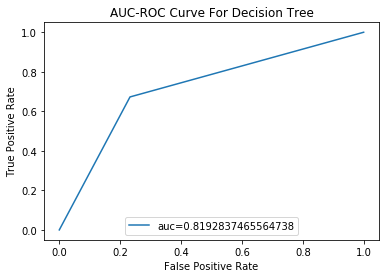

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve,roc_auc_score

dtc_probab=dtc.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,dtc_probab)


dtc_auc = roc_auc_score(y_test, dtc_probab)

plt.plot(fpr,tpr,label='auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve For Decision Tree')

plt.legend(loc=8)  

In [19]:
from sklearn.cluster import KMeans

inertias=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(diabetes_df)
    inertias.append(km.inertia_)

In [20]:
inertias

[11615812.918327227,
 5142376.455984383,
 2913322.58008178,
 2150535.2887797765,
 1737004.1690590864,
 1466807.6543065677,
 1303501.2696337057,
 1146667.0131488135,
 1001772.5251423423,
 932768.0220705338]

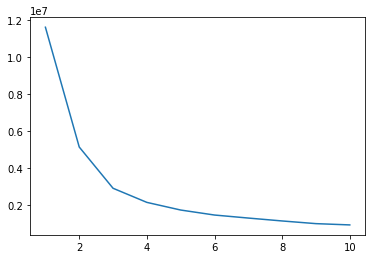

In [21]:
import matplotlib.pyplot as plt 

plt.plot(range(1,11),inertias)

plt.show()

In [22]:
km1=KMeans(n_clusters=5)

km1.fit(diabetes_df)

km1.labels_ # 0-->Cluster 1 , Cluster 2 -->1

array([0, 0, 0, 4, 1, 0, 4, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 4, 4, 1, 0,
       0, 0, 1, 4, 0, 1, 4, 0, 0, 3, 4, 0, 0, 1, 0, 0, 0, 1, 4, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 3, 0, 3, 4, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 4, 4, 4, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4,
       4, 0, 0, 1, 4, 0, 4, 1, 0, 4, 4, 1, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4,
       1, 2, 4, 0, 1, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 1, 4, 1, 0, 1, 0,
       1, 0, 4, 1, 4, 4, 0, 3, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 1, 0, 1, 2,
       0, 0, 4, 1, 4, 1, 0, 4, 3, 0, 0, 1, 0, 0, 0, 4, 0, 1, 0, 4, 4, 1,
       0, 1, 0, 0, 0, 4, 4, 0, 0, 0, 2, 4, 4, 1, 0, 4, 0, 0, 0, 1, 0, 4,
       4, 3, 0, 0, 0, 4, 1, 0, 3, 0, 4, 0, 0, 0, 0, 1, 1, 3, 1, 4, 0, 0,
       2, 0, 0, 1, 4, 0, 0, 0, 2, 4, 0, 3, 4, 0, 4, 0, 1, 0, 0, 0, 0, 4,
       0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 4, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 1, 1, 0, 0, 1,
       2, 1, 4, 4, 4, 4, 1, 1, 0, 1, 3, 1, 1, 0, 0,